# dependencies 

In [6]:
! pip install adtk yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 689.6 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 1.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


# imports

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# ADTK

In [9]:
from adtk.data import validate_series
from adtk.visualization import plot 
from adtk.detector import *

# import data

In [39]:
data = pd.read_csv('monthly_csv.csv')

data['Date'] = pd.to_datetime(data['Date'])

data = data.set_index("Date")

data = data['Mean']

# Threshold detection

In [44]:
threshold_detector = ThresholdAD(low=-0.5, high=0.75)
anomalies = threshold_detector.detect(data)

[<AxesSubplot:>]

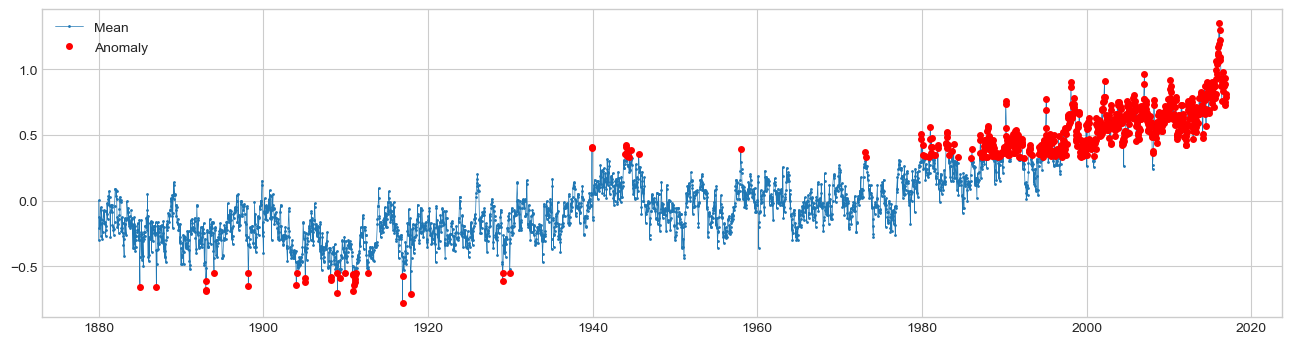

In [73]:
# this is the plot from adtk
plot(data, anomaly = anomalies,  anomaly_color= 'red', anomaly_tag = 'marker')

In [ ]:
# This is an example of a manually set high and low threshold.

# Quantile detection

In [65]:
Quantile_detector = QuantileAD(low=0.01, high=0.80)

In [66]:
anomalies = Quantile_detector.fit_detect(data) # the difference here is that it needs to be fit to the data.

[<AxesSubplot:>]

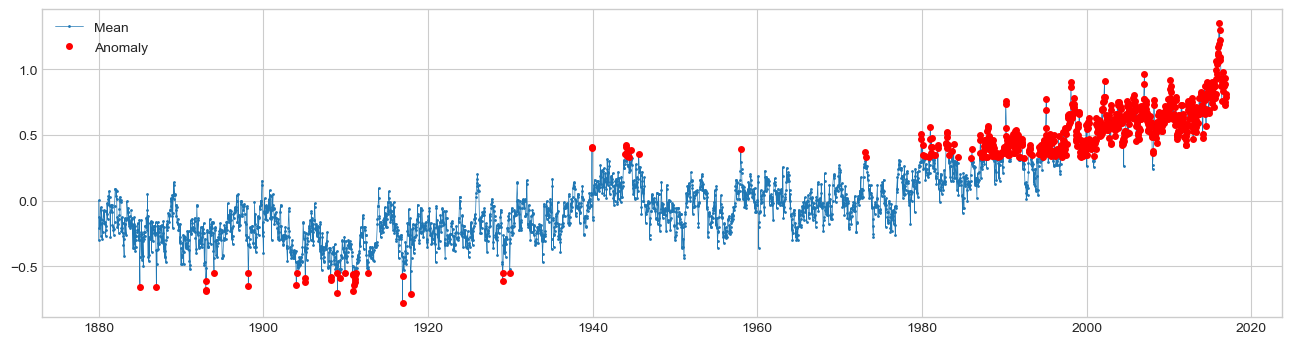

In [74]:
# this is the plot from adtk
plot(data, anomaly = anomalies,  anomaly_color= 'red', anomaly_tag = 'marker')

# IQR detector

In [76]:
iqr_detector = InterQuartileRangeAD(c = 1.5)
anomalies = iqr_detector.fit_detect(data) # the difference here is that it needs to be fit to the data.

[<AxesSubplot:>]

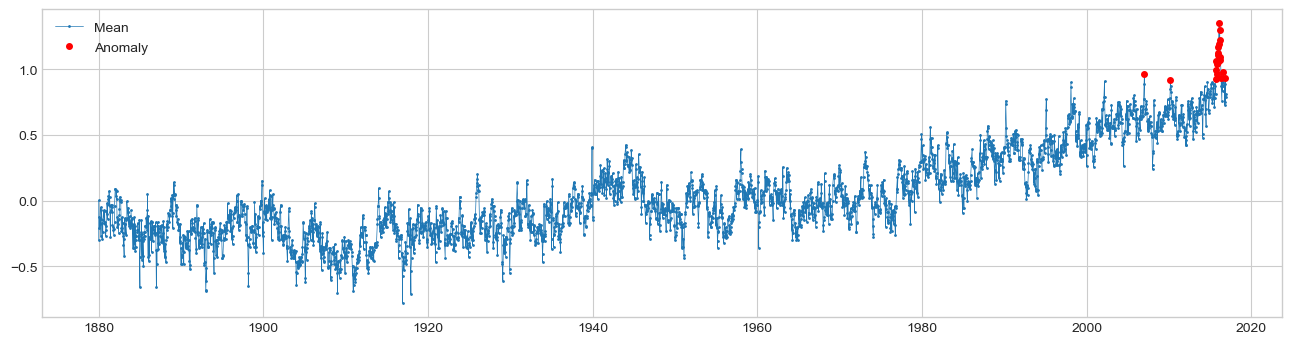

In [77]:
# this is the plot from adtk
plot(data, anomaly = anomalies,  anomaly_color= 'red', anomaly_tag = 'marker')